In [1]:
# CS 364 - Machine Learning
# Programming Assignment: Decision Tree for Diabetes Classification

# Import Necessary Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
# Load the data from the CSV file
df = pd.read_csv("Downloads\Dataset of Diabetes .csv")

# Display the first few rows to understand its structure
print("--- First 5 Rows of the Dataset ---")
print(df.head())

# Display dataset information (columns, data types, non-null counts)
print("\n--- Dataset Information ---")
df.info()

--- First 5 Rows of the Dataset ---
    ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1  735      34221      M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2  420      47975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3  680      87656      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4  504      34223      M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   

    BMI CLASS  
0  24.0     N  
1  23.0     N  
2  24.0     N  
3  24.0     N  
4  21.0     N  

--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null 

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\mlege\AppData\Local\Temp\ipykernel_4336\1610385692.py:2: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("Downloads\Dataset of Diabetes .csv")


In [3]:
# Drop non-feature columns like ID and No_Pation
df = df.drop(columns=['ID', 'No_Pation'])

# Handle potential whitespace issues in column names and data
df.columns = df.columns.str.strip()

# Clean the CLASS column data before mapping
# There might be extra spaces, so we strip them
df['CLASS'] = df['CLASS'].str.strip()

# Encode the categorical 'Gender' column into numerical format
df['Gender'] = df['Gender'].apply(lambda x: 1 if x.strip() == 'M' else 0)

# Encode the target 'CLASS' variable into numerical format
class_mapping = {'N': 0, 'P': 1, 'Y': 2}
df['CLASS'] = df['CLASS'].map(class_mapping)

# Drop rows with any missing values that might have resulted from preprocessing
df.dropna(inplace=True)

# Display the cleaned data's head to confirm changes
print("--- Cleaned Data Head ---")
print(df.head())

--- Cleaned Data Head ---
   Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI  CLASS
0       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0      0
1       1   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6  23.0      0
2       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0      0
3       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0      0
4       1   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4  21.0      0


In [7]:
# Define features (X) and target (y)
X = df.drop('CLASS', axis=1)
y = df['CLASS']
feature_names = X.columns.tolist()
class_names = ['Non-Diabetic', 'Predict-Diabetic', 'Diabetic']

# First split: 85% for training+validation, 15% for testing
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

# Second split: Split the 85% into training (70%) and validation (15%)
# The test_size here is relative to the X_train_val dataframe
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42, stratify=y_train_val) # 0.1765 * 0.85 = ~0.15

print(f"--- Data Shapes ---")
print(f"Training set:   {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set:       {X_test.shape}")

--- Data Shapes ---
Training set:   (699, 11)
Validation set: (151, 11)
Test set:       (150, 11)


In [9]:
# We will train models with different depths and check their performance on the validation set
validation_accuracies = []
depths = range(2, 16) # Test depths from 2 to 15

print("--- Finding Optimal max_depth ---")
for depth in depths:
    # Create and train the model
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    
    # Evaluate on the validation set
    val_preds = model.predict(X_val)
    accuracy = accuracy_score(y_val, val_preds)
    validation_accuracies.append(accuracy)
    print(f"Depth: {depth}, Validation Accuracy: {accuracy:.5f}")

# Find the best depth that gives the highest validation accuracy
best_depth = depths[validation_accuracies.index(max(validation_accuracies))]
print(f"\nOptimal max_depth found: {best_depth}")

--- Finding Optimal max_depth ---
Depth: 2, Validation Accuracy: 0.91391
Depth: 3, Validation Accuracy: 0.96689
Depth: 4, Validation Accuracy: 0.98675
Depth: 5, Validation Accuracy: 0.98013
Depth: 6, Validation Accuracy: 0.98675
Depth: 7, Validation Accuracy: 0.98675
Depth: 8, Validation Accuracy: 0.98675
Depth: 9, Validation Accuracy: 0.98675
Depth: 10, Validation Accuracy: 0.98675
Depth: 11, Validation Accuracy: 0.98675
Depth: 12, Validation Accuracy: 0.98675
Depth: 13, Validation Accuracy: 0.98675
Depth: 14, Validation Accuracy: 0.98675
Depth: 15, Validation Accuracy: 0.98675

Optimal max_depth found: 4


In [11]:
# Train the final model on the combined training and validation data with the optimal depth
final_model = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
final_model.fit(X_train_val, y_train_val)

print(f"Final model with max_depth={best_depth} has been trained successfully.")

Final model with max_depth=4 has been trained successfully.


--- Model Evaluation on Test Set ---
Accuracy on the test set: 0.9933

Confusion Matrix:
[[ 15   0   0]
 [  0   7   1]
 [  0   0 127]]

Saved confusion matrix plot to 'confusion_matrix.png'


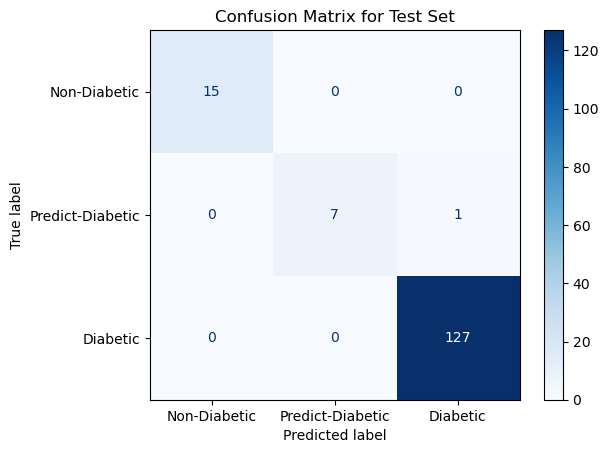

In [13]:
# Make predictions on the unseen test set
test_preds = final_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_preds)

print(f"--- Model Evaluation on Test Set ---")
print(f"Accuracy on the test set: {test_accuracy:.4f}")

# Generate and print the confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, test_preds)
print(cm)

# Visualize the confusion matrix for better interpretation
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Test Set')
plt.savefig('confusion_matrix.png')
print("\nSaved confusion matrix plot to 'confusion_matrix.png'")

--- Visualizing the Final Decision Tree ---
Saved decision tree visualization to 'decision_tree.png'


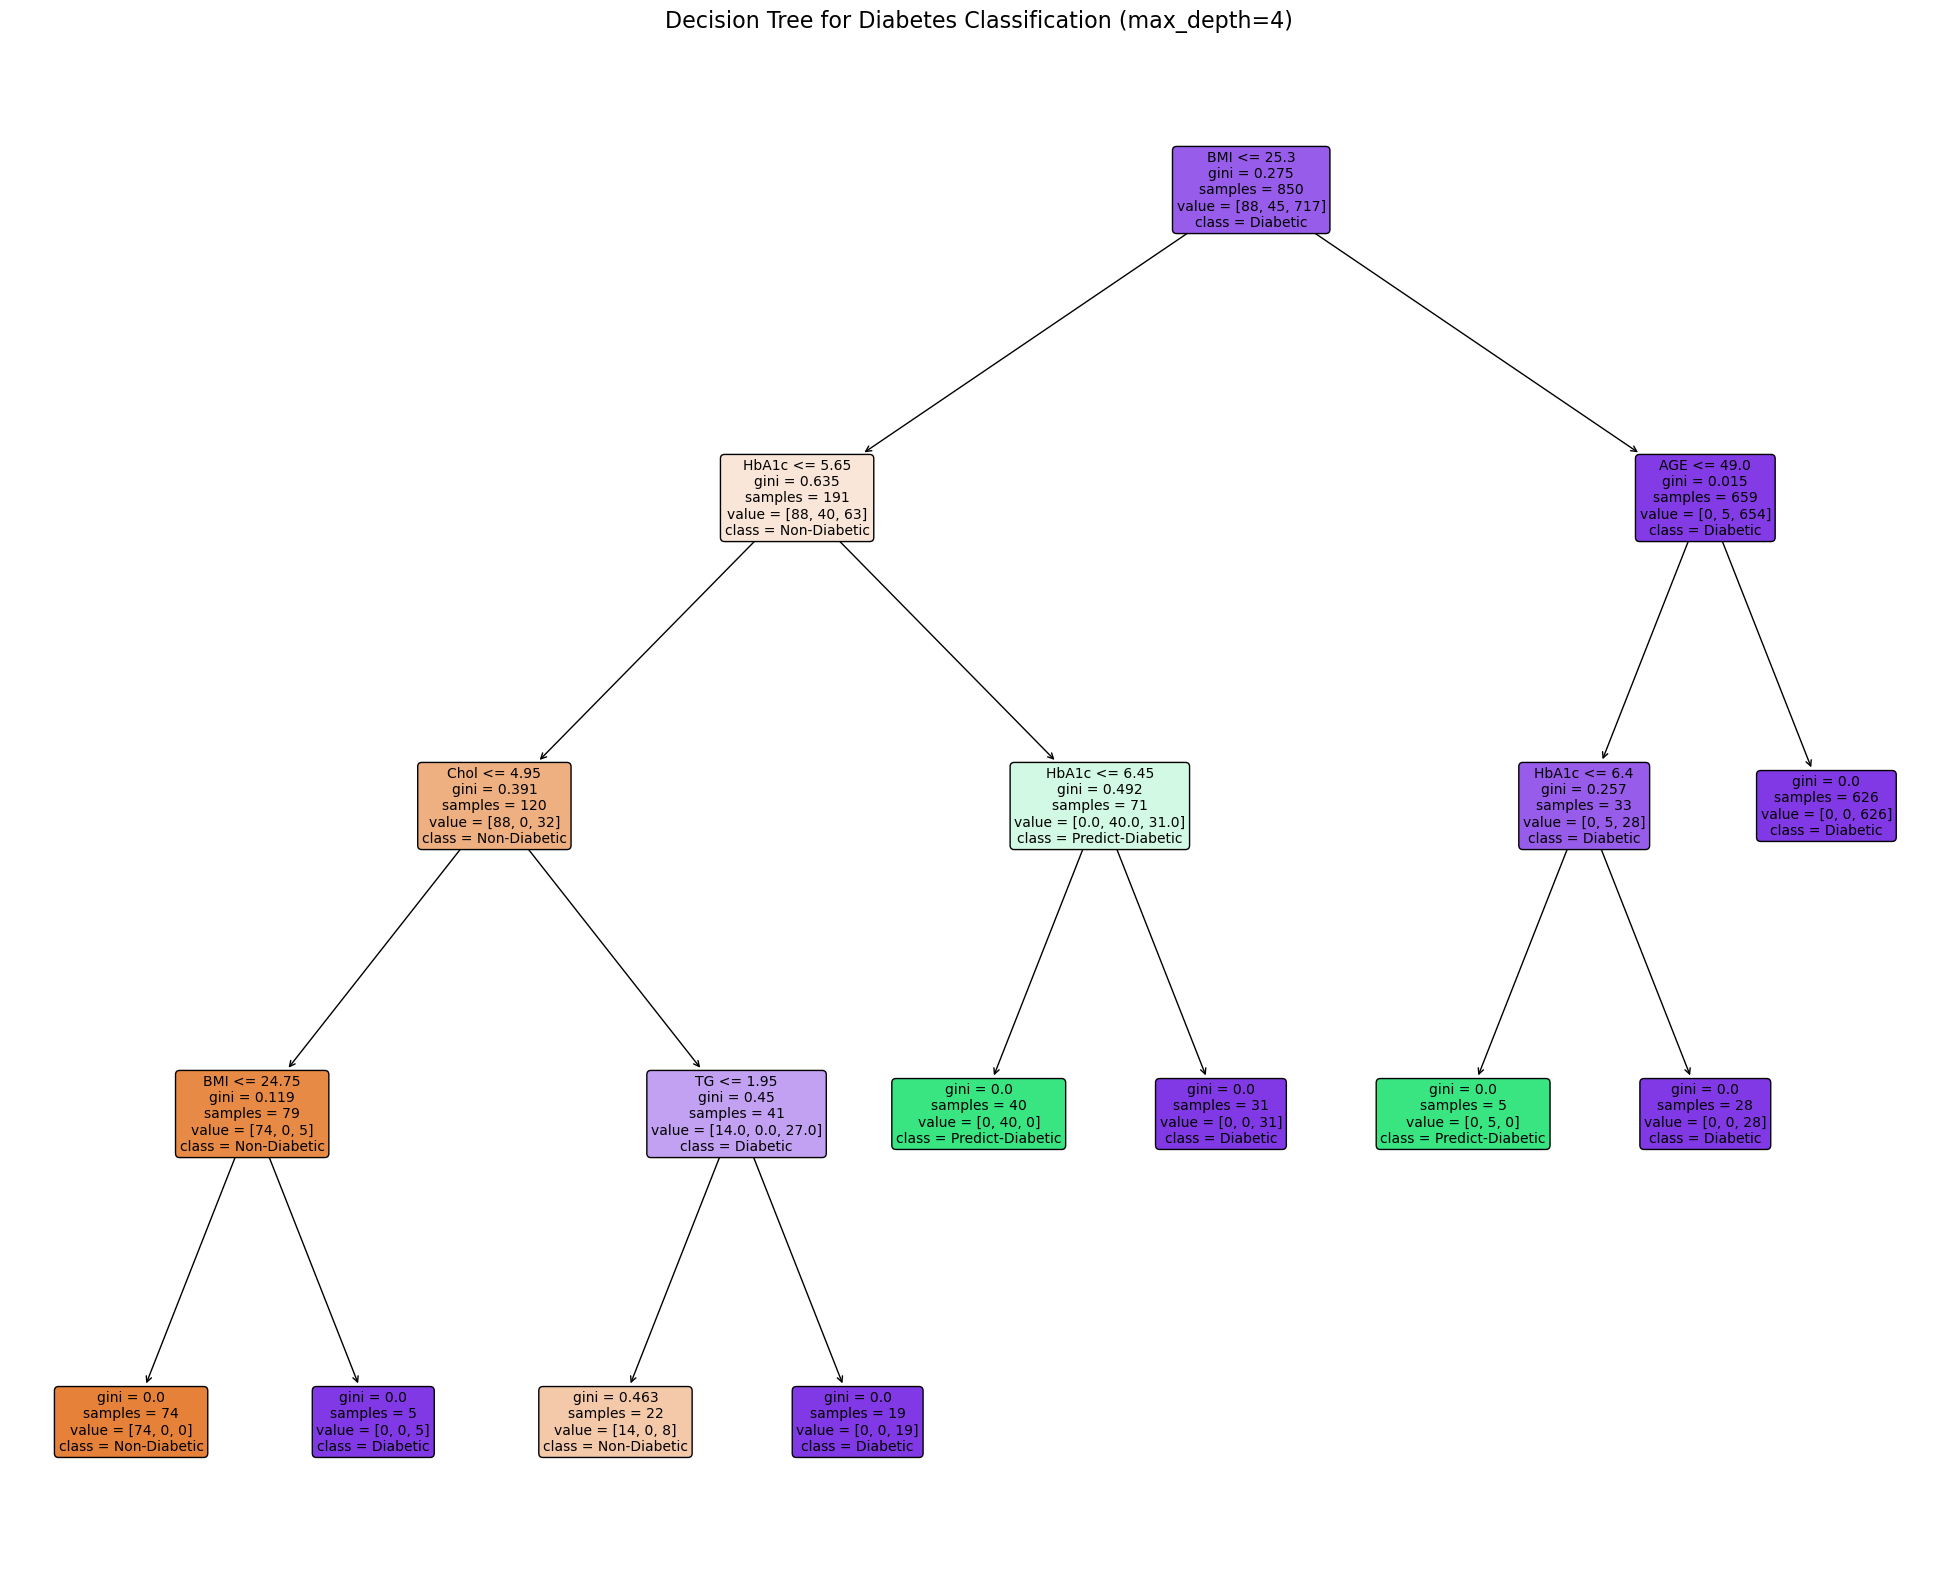

In [18]:
print("--- Visualizing the Final Decision Tree ---")

# Create a plot of the tree
plt.figure(figsize=(25, 20)) # Increase figure size for better readability
tree.plot_tree(final_model,
               feature_names=feature_names,
               class_names=class_names,
               filled=True,
               rounded=True,
               fontsize=10)

plt.title(f"Decision Tree for Diabetes Classification (max_depth={best_depth})", fontsize=16)
plt.savefig('decision_tree.png')
print("Saved decision tree visualization to 'decision_tree.png'")

In [15]:
# --- خلية جديدة للتنبؤ بناءً على إدخال المستخدم ---
import numpy as np

try:
    print("--- Please Enter Patient Data ---")
    
    # استقبال البيانات من المستخدم مع تحويلها إلى النوع الرقمي المناسب
    # معالجة خاصة لخانة الجنس
    gender_input = input("Enter Gender (M for Male, F for Female): ").strip().upper()
    if gender_input not in ['M', 'F']:
        raise ValueError("Invalid input for Gender. Please enter M or F.")
    gender = 1 if gender_input == 'M' else 0

    age = float(input("Enter AGE: "))
    urea = float(input("Enter Urea level (e.g., 4.7): "))
    cr = float(input("Enter Cr (Creatinine) level (e.g., 46): "))
    hba1c = float(input("Enter HbA1c level (e.g., 4.9): "))
    chol = float(input("Enter Chol (Cholesterol) level (e.g., 4.2): "))
    tg = float(input("Enter TG (Triglycerides) level (e.g., 0.9): "))
    hdl = float(input("Enter HDL level (e.g., 2.4): "))
    ldl = float(input("Enter LDL level (e.g., 1.4): "))
    vldl = float(input("Enter VLDL level (e.g., 0.5): "))
    bmi = float(input("Enter BMI (e.g., 24.0): "))

    # إنشاء مصفوفة بالبيانات التي أدخلها المستخدم لتكون متوافقة مع النموذج
    user_data = np.array([[
        gender, age, urea, cr, hba1c, chol, tg, hdl, ldl, vldl, bmi
    ]])

    # استخدام النموذج المُدرَّب للتنبؤ
    prediction_result = final_model.predict(user_data)

    # تحويل نتيجة التنبؤ الرقمية إلى اسم الفئة المقابل لها
    predicted_class_name = class_names[prediction_result[0]]

    # طباعة النتيجة النهائية للمستخدم
    print("\n--- Prediction Result ---")
    print(f"Based on the provided data, the model predicts the patient's class is: {predicted_class_name}")

except ValueError as ve:
    # في حال أدخل المستخدم قيمة غير رقمية
    print(f"\n[Error] Invalid input. {ve}. Please run the cell again and enter correct numerical values.")
except Exception as e:
    # للتعامل مع أي أخطاء أخرى غير متوقعة
    print(f"\nAn unexpected error occurred: {e}")

--- Please Enter Patient Data ---


Enter Gender (M for Male, F for Female):  m
Enter AGE:  23
Enter Urea level (e.g., 4.7):  4.6
Enter Cr (Creatinine) level (e.g., 46):  45
Enter HbA1c level (e.g., 4.9):  4.8
Enter Chol (Cholesterol) level (e.g., 4.2):  2.3
Enter TG (Triglycerides) level (e.g., 0.9):  1
Enter HDL level (e.g., 2.4):  2
Enter LDL level (e.g., 1.4):  3
Enter VLDL level (e.g., 0.5):  1
Enter BMI (e.g., 24.0):  23



--- Prediction Result ---
Based on the provided data, the model predicts the patient's class is: Non-Diabetic


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
